In [1]:
# Import required libraries
import os
import pandas as pd
import numpy as np
import torch
from model_builder import create_dnn_model, create_cnn_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from model_builder import SimpleDNN, SimpleCNN
import torch.nn.functional as F
from plotter import visualize_tissue_image_with_samples, visualize_tissue_image_with_samples_color_labels

input_csv = "training_data/WSI_patch_embeddings_centered-224_adenocarcinoma_leiden_0.3_training-data.csv"
df = pd.read_csv(input_csv)


# Settings: 
do_pca = True
pca_components = 10
pca_dimensions = [0.8, 0.85, 0.9, 0.95]
epochs = 1
output_base_path = "models/"
output_path_extra_desciptor = "" # leave empyt if not needed; 
ebbeding_dim = 1536
result_subfolder = "leiden_0.3_adenocarcinoma_224"

Get pathology training data

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

feature_cols = [str(i) for i in range(1536)]
X = df[feature_cols].values.astype(np.float32)

scaler = StandardScaler()
X = scaler.fit_transform(X).astype(np.float32)
y = LabelEncoder().fit_transform(df['label'].values).astype(np.int64)
labelEncoder = LabelEncoder().fit(df['label'].values)


df = pd.read_csv(input_csv)
X_pcaList = []
for d in pca_dimensions:
# Initialize PCA with the specified number of components
    pca = PCA(n_components=pca_components)
    X_pcaList.append(pca.fit_transform(X))

Train DNN model

In [3]:
dnn_list = []
acc_list_dnn = []
if do_pca:
    print("Using PCA for dimensionality reduction...")
    for i, X_pca in enumerate(X_pcaList):
        print(f"Shape of PCA transformed data: {X_pca.shape}")
        X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)
        
        dnn_output_path = f"{output_base_path}/dnn_pathology_model_pca_{pca_components}.pth"
        model,acc = create_dnn_model(X_train, X_test, y_train, y_test, dnn_output_path, labelEncoder, 
                                   inputDim=pca_components, epochs=epochs)
        dnn_list.append(model)
        acc_list_dnn.append(acc)
        print(f"Training set size: {X_train.shape[0]}")
        print(f"Testing set size: {X_test.shape[0]}")
        print("")
        
# Once without PCA        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


dnn_output_path = f"{output_base_path}/dnn_pathology_model_without_pca.pth"
dnn_without_pca, acc_without_pca = create_dnn_model(X_train, X_test, y_train, y_test, dnn_output_path, labelEncoder, 
                                                  inputDim=ebbeding_dim, epochs=epochs)
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Using PCA for dimensionality reduction...
Shape of PCA transformed data: (4371, 10)
DNN: Epoch 1 completed. Average Loss: 1.0816
DNN Accuracy: 0.744
Training set size: 3496
Testing set size: 875

Shape of PCA transformed data: (4371, 10)
DNN: Epoch 1 completed. Average Loss: 1.0860
DNN Accuracy: 0.745
Training set size: 3496
Testing set size: 875

Shape of PCA transformed data: (4371, 10)
DNN: Epoch 1 completed. Average Loss: 1.0896
DNN Accuracy: 0.745
Training set size: 3496
Testing set size: 875

Shape of PCA transformed data: (4371, 10)
DNN: Epoch 1 completed. Average Loss: 1.0713
DNN Accuracy: 0.757
Training set size: 3496
Testing set size: 875

DNN: Epoch 1 completed. Average Loss: 0.8945
DNN Accuracy: 0.816
Training set size: 3496
Testing set size: 875


Train CNN model

In [4]:

cnn_list = []
acc_list_cnn = []
if do_pca:
    print("Using PCA for dimensionality reduction...")
    for i, X_pca in enumerate(X_pcaList):
        print(f"Shape of PCA transformed data: {X_pca.shape}")
        X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)
        
        cnn_output_path = f"{output_base_path}/cnn_pathology_model_pca_{pca_components}.pth"
        model,acc = create_cnn_model(X_train, X_test, y_train, y_test, cnn_output_path, labelEncoder, 
                                   inputDim=pca_components, epochs=epochs)
        cnn_list.append(model)
        acc_list_cnn.append(acc)
        print(f"Training set size: {X_train.shape[0]}")
        print(f"Testing set size: {X_test.shape[0]}")
        print("")
        
# Once without PCA        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


cnn_output_path = f"{output_base_path}/cnn_pathology_model_without_pca.pth"
cnn_without_pca, acc_without_pca = create_cnn_model(X_train, X_test, y_train, y_test, cnn_output_path, labelEncoder, 
                                                  inputDim=ebbeding_dim, epochs=epochs)
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Using PCA for dimensionality reduction...
Shape of PCA transformed data: (4371, 10)
CNN: Epoch 1 completed. Average Loss: 1.7846
Training set size: 3496
Testing set size: 875

Shape of PCA transformed data: (4371, 10)
CNN: Epoch 1 completed. Average Loss: 1.7838
Training set size: 3496
Testing set size: 875

Shape of PCA transformed data: (4371, 10)
CNN: Epoch 1 completed. Average Loss: 1.7422
Training set size: 3496
Testing set size: 875

Shape of PCA transformed data: (4371, 10)
CNN: Epoch 1 completed. Average Loss: 1.6895
Training set size: 3496
Testing set size: 875

CNN: Epoch 1 completed. Average Loss: 0.8610
Training set size: 3496
Testing set size: 875


~~Load trained models and perform dummy predictions~~ We dont extrnaly save the models


In [5]:
# # Load DNN model
# if do_pca:
#     input_dim = pca_components
# else:
#     input_dim = 1536
# dnn_list = []

# #for each pca_components in pca_dimensions load all models
# for pca_components in pca_dimensions:
#     dnn_output_path = f"{output_base_path}dnn_pathology_model_pca_{pca_components}.pth"
#     dnn_model = SimpleDNN(input_dim, len(np.unique(y_train)))
#     checkpoint_dnn = torch.load(dnn_output_path)
#     dnn_model.load_state_dict(checkpoint_dnn.get("state_dict", checkpoint_dnn))
#     dnn_list.append(dnn_model)
#     dnn_model.eval()


    
# # dnn_model = SimpleDNN(input_dim, len(np.unique(y_train)))
# # checkpoint_dnn = torch.load(dnn_output_path)
# # dnn_model.load_state_dict(checkpoint_dnn.get("state_dict", checkpoint_dnn))
# # dnn_model.eval()


In [6]:

# # Load CNN model
# cnn_model = SimpleCNN(len(np.unique(y_train)))
# checkpoint_cnn = torch.load(cnn_output_path)
# cnn_model.load_state_dict(checkpoint_cnn.get("state_dict", checkpoint_cnn))
# cnn_model.eval()

In [7]:
# # Load saved label classes from the DNN model checkpoint
# checkpoint = torch.load(dnn_output_path)
# if "label_classes" in checkpoint:
#     original_labels = np.array(checkpoint["label_classes"])

# # One sample demo predictions of DNN model
# sample_input = torch.tensor(X_test[0]).unsqueeze(0)  # Add batch dimension
# dnn_output = dnn_model(sample_input)
# dnn_pred_enc = F.softmax(dnn_output, dim=1).argmax(dim=1).item()
# dnn_pred_label = original_labels[dnn_pred_enc]
# true_label = original_labels[y_test[0]]
# print(f"DNN model prediction: {dnn_pred_label} (encoded: {dnn_pred_enc}), True: {true_label} (encoded: {y_test[0]})")

# # One sample demo predictions of CNN model
# sample_input = torch.tensor(X_test[0]).unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions
# #cnn_output = cnn_model(sample_input)
# #cnn_pred_enc = F.softmax(cnn_output, dim=1).argmax(dim=1).item()
# #cnn_pred_label = original_labels[cnn_pred_enc]
# #print(f"CNN model prediction: {cnn_pred_label} (encoded: {cnn_pred_enc}), True: {true_label} (encoded: {y_test[0]})")


In [8]:
print(df.columns)

Index(['Patch_X', 'Patch_Y', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '1527', '1528', '1529', '1530', '1531', '1532', '1533', '1534', '1535',
       'label'],
      dtype='object', length=1539)


## Visualize Sample points

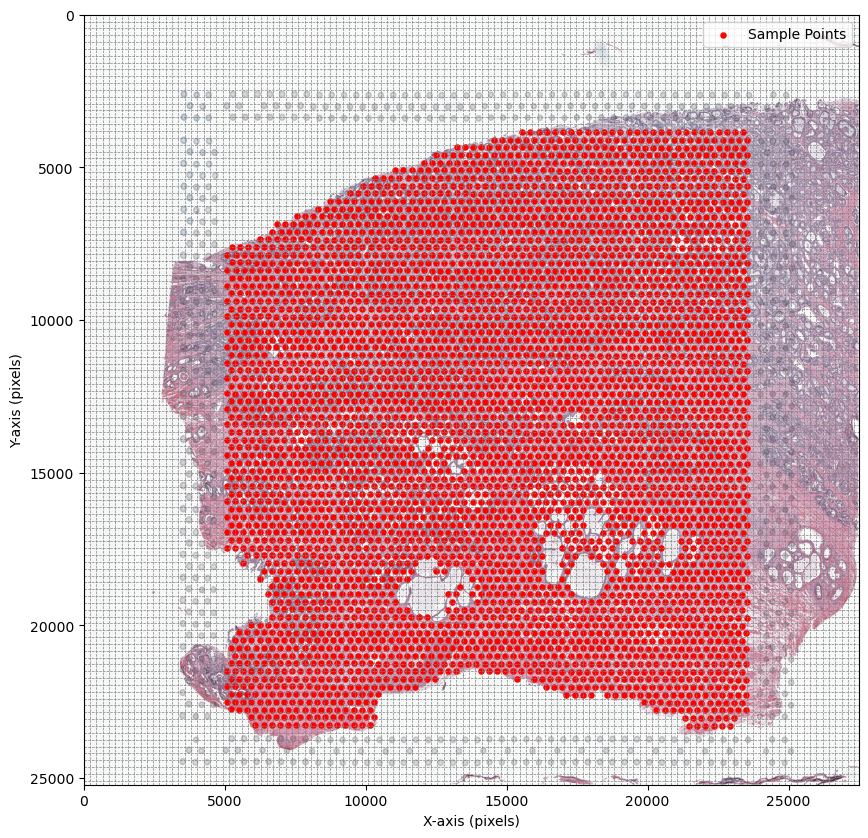

In [9]:
image_path = "spatial/tissue_hires_image.png"
visualize_tissue_image_with_samples(image_path, df, 27482, 25219)



## Visualize Ground Truth Labels on Tissue Image

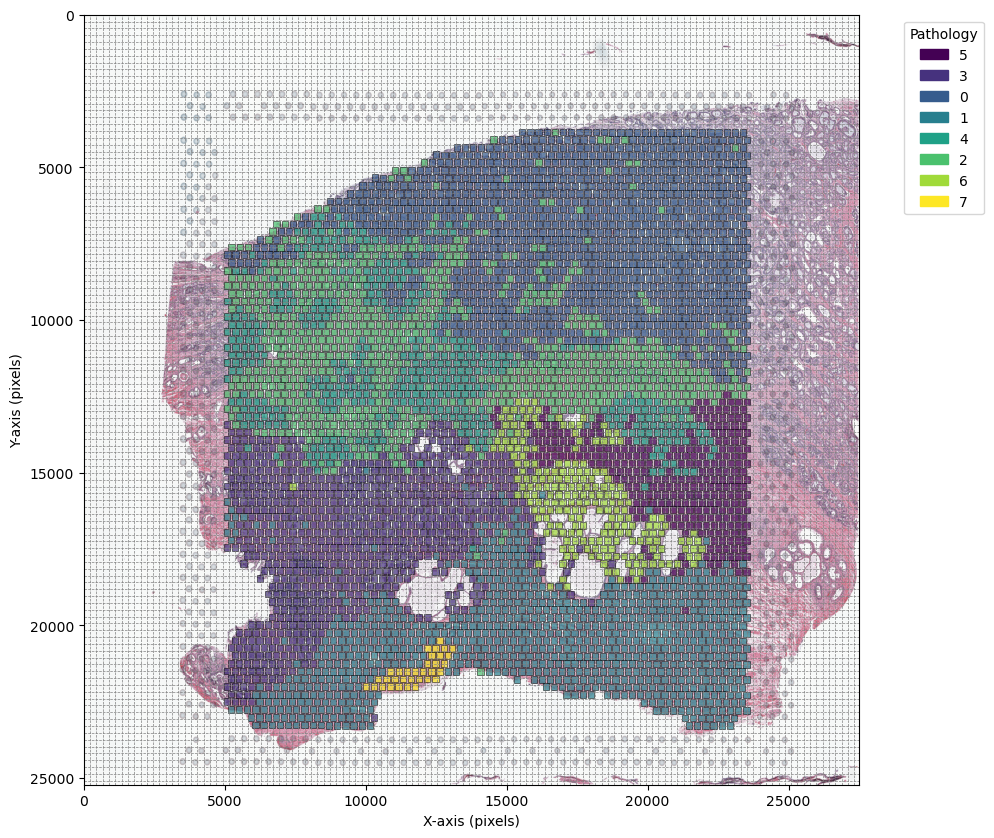

In [10]:
image_path = "spatial/tissue_hires_image.png"
visualize_tissue_image_with_samples_color_labels(image_path, df, 27482, 25219)


## Visualize predictions from DNN

In [11]:
original_labels = labelEncoder.classes_.tolist()

# Get predictions for all data
list_of_prediced_labels = []
X_tensor = torch.tensor(X_pca).float()
list_of_df_predicted_dnn = []
list_of_model_names = []
for i,dnn_model in enumerate(dnn_list):
    # for each dnn_model in dnn_list ceate a df with Patch X and Patch Y as columns and then a predicted label column
    X_tensor = torch.tensor(X_pcaList[i]).float()
    with torch.no_grad():
        dnn_outputs_temp = dnn_model(X_tensor)
        #y_confidence = F.softmax(dnn_outputs_temp, dim=1)
        #print(f"Shape of DNN outputs: {y_confidence.shape}")
        temp = F.softmax(dnn_outputs_temp, dim=1).argmax(dim=1)
        # list comphehension of predicted labels
        prediced_labels =  [original_labels[label] for label in temp.numpy()]
        df_predicted_dnn = df[['Patch_X', 'Patch_Y']].copy()
        df_predicted_dnn['label'] = prediced_labels
        list_of_prediced_labels.append(prediced_labels)
        # Append the dataframe to the list
        list_of_model_names.append(f'dnn_pca_{i+1}')
        df_predicted_dnn['pca_components'] = pca_components
        list_of_df_predicted_dnn.append(df_predicted_dnn)




In [12]:
from sklearn.metrics import adjusted_rand_score, f1_score, roc_auc_score

# calculate the ARIC score for each model
# Calculate ARI, F1 and ROCauc for each PCA model
ari_score_list = []
f1_score_list = []
for i, preds in enumerate(list_of_prediced_labels):
    f1 = f1_score(y, preds, average='weighted')  # Assuming y is the true labels
    ari_score = adjusted_rand_score(y, preds)# y is the true labels
    ari_score_list.append(ari_score)
    f1_score_list.append(f1)
    



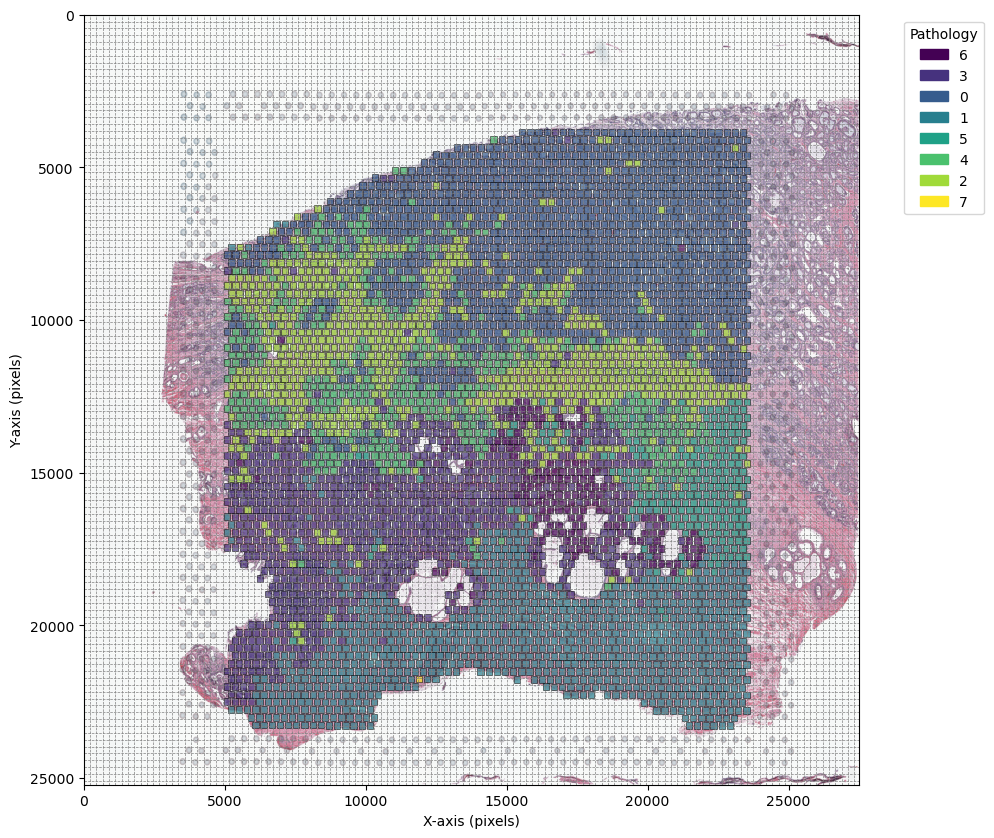

In [13]:
# now visulize without PCA
X_tensor = torch.tensor(X).float()
with torch.no_grad():
	dnn_outputs = dnn_without_pca(X_tensor)
	dnn_preds_enc = F.softmax(dnn_outputs, dim=1).argmax(dim=1)
predicted_labels = [original_labels[label] for label in dnn_preds_enc.numpy()]
image_path = "spatial/tissue_hires_image.png"
df_predicted_dnn = df[['Patch_X', 'Patch_Y']].copy()
df_predicted_dnn['label'] = predicted_labels

# Calculate ARI for the model without PCA
ari_score_without_pca = adjusted_rand_score(y, predicted_labels)

image_path = "spatial/tissue_hires_image.png"
visualize_tissue_image_with_samples_color_labels(image_path, df_predicted_dnn, 27482, 25219)

In [14]:
results_dir = f"results/{result_subfolder}"
os.makedirs(results_dir, exist_ok=True)
csv_path = f"results/{result_subfolder}/scores.csv"

# Create a DataFrame with model performance metrics
results_data = []
    
# Add the model without PCA (using variables from cell 23)
results_data.append({
    'name': 'dnn_without_pca',
    'accuracy': acc_without_pca,
    'ari': ari_score_without_pca,
    'f1': f1_score([original_labels[label] for label in y], predicted_labels, average='weighted')
})

# Create DataFrame and save to CSV

print(f"Results saved to: {csv_path}")
for i, df_predicted_dnn in enumerate(list_of_df_predicted_dnn):
    output_path = f"results/{result_subfolder}/dnn_pca_{list_of_model_names[i]}_predictions.png"
    print(f"Model {list_of_model_names[i]} \nAccuracy: {acc_list_dnn[i]} ARI score: {ari_score_list[i]} F1 score: {f1_score_list[i]}")
    visualize_tissue_image_with_samples_color_labels(image_path,list_of_df_predicted_dnn[i], 27482, 25219,output_path=output_path)
    results_data.append({
        'name': list_of_model_names[i],
        'accuracy': acc_list_dnn[i],
        'ari': ari_score_list[i],
        'f1': f1_score_list[i]
    })

# Write csv
results_df = pd.DataFrame(results_data)
results_df.to_csv(csv_path, index=False)



Results saved to: results/leiden_0.3_adenocarcinoma_224/scores.csv
Model dnn_pca_1 
Accuracy: 0.744 ARI score: 0.5965314185529581 F1 score: 0.7444333998706358
Model dnn_pca_2 
Accuracy: 0.7451428571428571 ARI score: 0.6047398464979551 F1 score: 0.7533783869843108
Model dnn_pca_3 
Accuracy: 0.7451428571428571 ARI score: 0.5915102053358543 F1 score: 0.7360754420072303
Model dnn_pca_4 
Accuracy: 0.7565714285714286 ARI score: 0.6058144660190753 F1 score: 0.7625460019759854


# Visualize CNN output

In [15]:
original_labels = labelEncoder.classes_.tolist()

# Get predictions for all data
list_of_prediced_labels = []
X_tensor = torch.tensor(X_pca).float()
list_of_df_predicted_cnn = []
list_of_model_names_cnn = []
for i,cnn_model in enumerate(cnn_list):
    # for each cnn_model in cnn_list ceate a df with Patch X and Patch Y as columns and then a predicted label column
    X_tensor = torch.tensor(X_pcaList[i]).float()
    with torch.no_grad():
        cnn_outputs_temp = cnn_model(X_tensor.unsqueeze(1))
        #y_confidence = F.softmax(cnn_outputs_temp, dim=1)
        #print(f"Shape of DNN outputs: {y_confidence.shape}")
        temp = F.softmax(cnn_outputs_temp, dim=1).argmax(dim=1)
        # list comphehension of predicted labels
        prediced_labels =  [original_labels[label] for label in temp.numpy()]
        df_predicted_cnn = df[['Patch_X', 'Patch_Y']].copy()
        df_predicted_cnn['label'] = prediced_labels
        list_of_prediced_labels.append(prediced_labels)
        # Append the dataframe to the list
        list_of_model_names_cnn.append(f'cnn_pca_{i+1}')
        df_predicted_cnn['pca_components'] = pca_components
        list_of_df_predicted_cnn.append(df_predicted_cnn)




In [16]:
from sklearn.metrics import adjusted_rand_score, f1_score

# calculate the ARIC score for each model
# Calculate ARI, F1 and ROCauc for each PCA model
ari_score_list_cnn = []
f1_score_list_cnn = []
roc_auc_score_list_cnn = []
for i, preds in enumerate(list_of_prediced_labels):
    #roc = roc_auc_score(y, preds, multi_class='ovr')  # Assuming y is the true labels
    f1 = f1_score(y, preds, average='weighted')  # Assuming y is the true labels
    ari_score = adjusted_rand_score(y, preds)# y is the true labels
    ari_score_list_cnn.append(ari_score)
    f1_score_list_cnn.append(f1)
    #roc_auc_score_list.append(roc)
    



In [17]:
results_dir = f"results/{result_subfolder}"
os.makedirs(results_dir, exist_ok=True)
csv_path = f"results/{result_subfolder}/scores.csv"

# Create a DataFrame with model performance metrics
results_data = []
    
# Add the model without PCA (using variables from cell 23)
results_data.append({
    'name': 'cnn_without_pca',
    'accuracy': acc_without_pca,
    'ari': ari_score_without_pca,
    'f1': f1_score([original_labels[label] for label in y], predicted_labels, average='weighted')
})

# Create DataFrame and save to CSV

print(f"Results saved to: {csv_path}")
for i, df_predicted_cnn in enumerate(list_of_df_predicted_cnn):
    output_path = f"results/{result_subfolder}/cnn_pca_{list_of_model_names_cnn[i]}_predictions.png"
    print(f"Model {list_of_model_names[i]} \nAccuracy: {acc_list_cnn[i]} ARI score: {ari_score_list[i]} F1 score: {f1_score_list[i]}")
    visualize_tissue_image_with_samples_color_labels(image_path,list_of_df_predicted_cnn[i], 27482, 25219,output_path=output_path)
    results_data.append({
        'name': list_of_model_names[i],
        'accuracy': acc_list_cnn[i],
        'ari': ari_score_list_cnn[i],
        'f1': f1_score_list_cnn[i]
    })

# Write csv
results_df = pd.DataFrame(results_data)
results_df.to_csv(csv_path, index=False)



Results saved to: results/leiden_0.3_adenocarcinoma_224/scores.csv
Model dnn_pca_1 
Accuracy: 0.5942857142857143 ARI score: 0.5965314185529581 F1 score: 0.7444333998706358
Model dnn_pca_2 
Accuracy: 0.5622857142857143 ARI score: 0.6047398464979551 F1 score: 0.7533783869843108
Model dnn_pca_3 
Accuracy: 0.5542857142857143 ARI score: 0.5915102053358543 F1 score: 0.7360754420072303
Model dnn_pca_4 
Accuracy: 0.6068571428571429 ARI score: 0.6058144660190753 F1 score: 0.7625460019759854


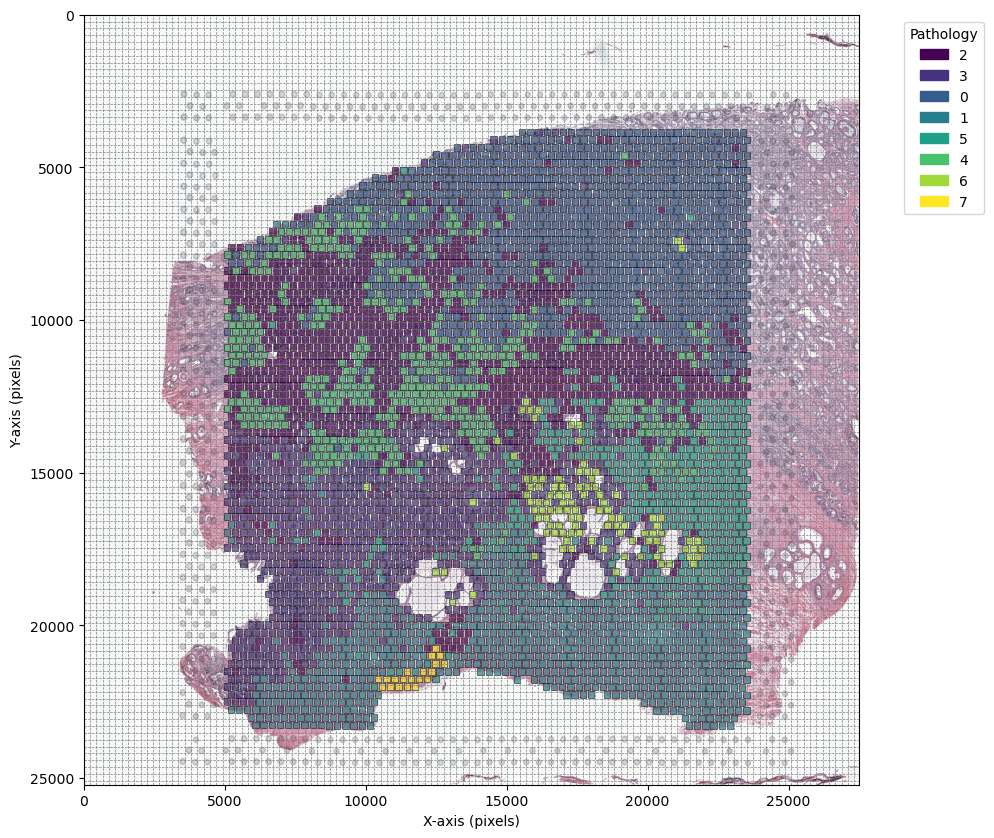

In [18]:

# now visulize without PCA
X_tensor = torch.tensor(X).float()
with torch.no_grad():
	cnn_outputs = cnn_without_pca(X_tensor.unsqueeze(1))
	cnn_preds_enc = F.softmax(cnn_outputs, dim=1).argmax(dim=1)
predicted_labels = [original_labels[label] for label in cnn_preds_enc.numpy()]
image_path = "spatial/tissue_hires_image.png"
df_predicted_cnn = df[['Patch_X', 'Patch_Y']].copy()
df_predicted_cnn['label'] = predicted_labels

# Calculate ARI for the model without PCA
ari_score_without_pca = adjusted_rand_score(y, predicted_labels)

image_path = "spatial/tissue_hires_image.png"
visualize_tissue_image_with_samples_color_labels(image_path, df_predicted_cnn, 27482, 25219)


